# Visualising the RodoSol ALPR Dataset

The following notebook will:
- Demonstrate how to use the RodoSolDataset class.
- Perform exploratory analysis on the dataset, and
- Visualise example images and labels.

In [1]:
import sys
import os

# Add the src folder to the Python path
sys.path.append(os.path.abspath("../src"))

# Now import the dataset class correctly
from datasets.RodoSolDataset import RodoSolDataset

In [9]:
data_dir = "../data/RodoSol-ALPR"  # Path to the dataset folder
annotations_file = "./annotations.csv"  # Path to annotations file

# Instantiate the dataset
dataset = RodoSolDataset(data_dir, annotations_file)

# Print dataset size to verify
print(f"Dataset size: {len(dataset)}")

Dataset size: 20000


In [14]:
# Check the first sample
image, label = dataset[0]
print("Sample Label:", label)

Sample Label: {'type': 'car', 'plate': 'MSY1064', 'layout': 'Brazilian', 'corners': [(747, 189), (824, 188), (824, 217), (747, 217)], 'image': '../data/RodoSol-ALPR/images/cars-br/img_001134.jpg'}


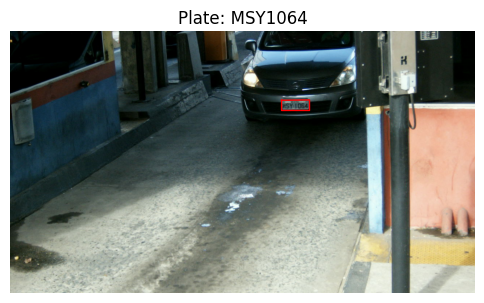

In [13]:
import matplotlib.pyplot as plt
from torchvision.transforms import ToPILImage

# Function to display a sample
def show_sample(idx):
    image, label = dataset[idx]
    
    # Convert tensor to PIL image
    to_pil = ToPILImage()
    image = to_pil(image)
    
    # Plot image
    plt.figure(figsize=(6,6))
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"Plate: {label.get('plate', 'N/A')}")
    
    # Draw bounding box if available
    if "corners" in label:
        corners = label["corners"]
        x_coords, y_coords = zip(*corners)
        x_coords += (x_coords[0],)  # Close the polygon
        y_coords += (y_coords[0],)
        plt.plot(x_coords, y_coords, color="red", linewidth=1)
    
    plt.show()

# Show the first image
show_sample(0)